In [1]:
%matplotlib ipympl

from matplotlib import pyplot as plt
from shapely.geometry import MultiPolygon, GeometryCollection, Polygon, LineString, Point, LinearRing
from shapely.ops import triangulate

In [2]:
def draw_multipolygon(multipolygon, ax, color="blue", alpha=0.2):
    if isinstance(multipolygon, Polygon):
        multipolygon = MultiPolygon([multipolygon])
    
    for polygon in multipolygon.geoms:
        x, y = polygon.exterior.xy
        ax.fill(x, y, alpha=alpha, color=color)  # Transparent fill
        for interior in polygon.interiors:
            x, y = interior.xy
            ax.fill(x, y, color="white")

In [3]:
multipolyexample1 = Polygon(
    [(0, 0), (0, 1), (0.5, 0.5), (1, 1), (1, 0)], 
    [[(0.4, 0.2), (0.6, 0.2), (0.6, 0.4)]]
)

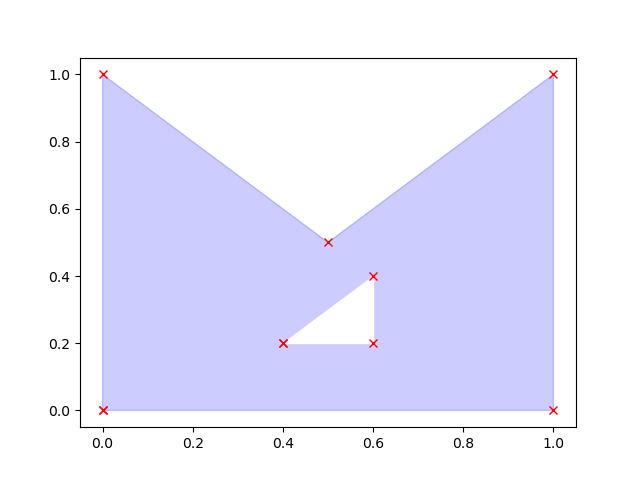

In [4]:
def extractpoints(multipol):
    if isinstance(multipol, MultiPolygon) or isinstance(multipol, GeometryCollection):
        res = []
        for poly in multipol.geoms:
            res += extractpoints(poly)
        return res
    elif isinstance(multipol, Polygon):
        res = list(multipol.exterior.coords)
        for interior in multipol.interiors:
            res += extractpoints(interior)
        return res
        
    elif isinstance(multipol, LineString) or isinstance(multipol, Point) or isinstance(multipol, LinearRing):
        return list(multipol.coords)
    else:
        return []

if __name__ == "__main__":
    _, axtestExtract = plt.subplots()
    draw_multipolygon(multipolyexample1, axtestExtract)
    xs, ys = zip(*extractpoints(multipolyexample1))
    axtestExtract.plot(xs, ys, 'rx')
    plt.show()

In [5]:
def barycenter(tri):
    a = tri.exterior.coords[0]
    b = tri.exterior.coords[1]
    c = tri.exterior.coords[2]
    return Point((a[0]+b[0]+c[0])/3, (a[1]+b[1]+c[1])/3)

def mytriangulatepoly(poly):
    res = list(filter(lambda tri: poly.contains(barycenter(tri)), triangulate(poly)))
    return res

def mytriangulate(multipoly):
    if isinstance(multipoly, MultiPolygon):
        res = []
        for poly in multipoly.geoms:
            res += mytriangulatepoly(poly)
        return res
    return mytriangulatepoly(multipoly)

MULTIPOLYGON (((0 1, 0 0, 0.4 0.2, 0 1)), ((0 1, 0.4 0.2, 0.5 0.5, 0 1)), ((1 1, 0.5 0.5, 0.6 0.4, 1 1)), ((1 1, 0.6 0.4, 1 0, 1 1)), ((1 0, 0.6 0.4, 0.6 0.2, 1 0)), ((1 0, 0.6 0.2, 0 0, 1 0)), ((0 0, 0.6 0.2, 0.4 0.2, 0 0)), ((0.4 0.2, 0.6 0.4, 0.5 0.5, 0.4 0.2)))


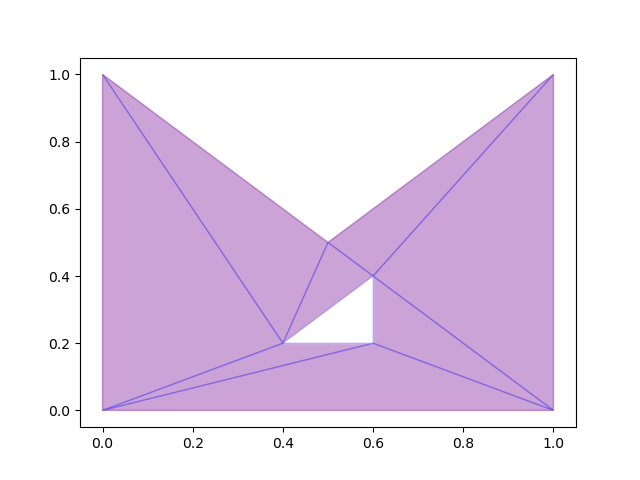

In [6]:
if __name__ == "__main__":
    triexample1 = mytriangulate(multipolyexample1)
    print(MultiPolygon(triexample1))
    
    _, axtestTri1 = plt.subplots()
    draw_multipolygon(multipolyexample1, axtestTri1, color='red', alpha=0.2)
    draw_multipolygon(MultiPolygon(triexample1), axtestTri1, alpha=0.2)
    plt.show()

In [7]:
def distancesq(a, b):
    return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2

def ptequalpt(a, b):
    return distancesq(a, b) < 0.000001
    
def findpointid(listofcouplepoints, pt, makeerror = True, visualize = False):
    theid = - 1
    for (a,b) in listofcouplepoints:
        if ptequalpt(pt, b):
            theid = a
    if (makeerror and theid == -1):
        if visualize:
            plt.plot(pt, 'b+', markersize=15)
            plt.draw()
            
        raise ValueError("point "+str(pt)+" not in listofcouplepoints")
    return theid

def ptinlist(listpoints, pt):
    for pt2 in listpoints:
        if ptequalpt(pt, pt2):
            return True
    return False

def trianglestofaces(biglist, triangles, reverse=False, visualize=False):
    res = []
    for tri in triangles:
        pts = extractpoints(tri)
        id1 = findpointid(biglist,pts[0], False, visualize)
        id2 = findpointid(biglist, pts[1], False, visualize)
        id3 = findpointid(biglist, pts[2], False, visualize)
        if reverse:
            res.append((id3, id2, id1))
        else:
            res.append((id1, id2, id3))
    return res

if __name__ == "__main__":
    listcoupleidpoint = [(0, (0, 0)), (1, (0, 1)), (2, (1, 1)), (3, (1, 0))]
    
    print(findpointid(listcoupleidpoint, (1, 1)))
    print(trianglestofaces(listcoupleidpoint, [Polygon([(0, 0), (1, 0), (1, 1)]), Polygon([(1, 1), (0, 1), (0, 0)])]))

2
[(0, 3, 2), (2, 1, 0)]


In [8]:
!jupyter nbconvert --to script polygon_utils.ipynb

[NbConvertApp] Converting notebook polygon_utils.ipynb to script
[NbConvertApp] Writing 4089 bytes to polygon_utils.py
